In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Part of the code taken from: A. Gulli, A. Kapoor, and S. Pal, Deep learning with TensorFlow 2 and Keras. Birmingham: Packt Publishing Ltd, 2019.
# Load data
((x_1, y_1), (x_2, y_2)) = tf.keras.datasets.mnist.load_data()
#Normalize the data and reshape
x_1= x_1 / 255.
x_1 = x_1.astype(np.float32)
x_1 = np.reshape(x_1, (x_1.shape[0], 784))
x_2= x_2 / 255.
x_2 = x_2.astype(np.float32)
x_2 = np.reshape(x_2, (x_2.shape[0], 784))
x=np.concatenate((x_1,x_2),axis=0)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
y_1=np.reshape(y_1,[y_1.shape[0],1])
y_2=np.reshape(y_2,[y_2.shape[0],1])
#y=np.concatenate((x_1,x_2),axis=0)

In [0]:
mean = x.mean(axis = 1) #Cntering the data
x = x - mean[:,None]
x.shape

(70000, 784)

In [0]:
s, u, v = tf.linalg.svd(x) #PCA using SVD of data matrix

In [0]:
s = tf.linalg.diag(s)

In [0]:
#Horn's Parallel Analysis
Sigma=(1/x.shape[0])*np.matmul(np.transpose(x),x)
Sigma.shape

(784, 784)

In [0]:
evals=np.linalg.eigvalsh(Sigma) #EVD of covariance matrix
evals.shape

(784,)

In [0]:
evals=np.reshape(evals,[evals.shape[0],1])
evals.shape

(784, 1)

In [0]:
evals1=np.sort(evals)
evals1=evals1[::-1]

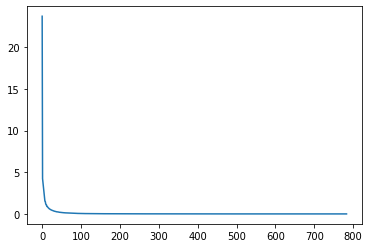

In [0]:
plt.plot(evals1) # Plotting the eigenvalues in descending order

In [0]:
counts=np.zeros(shape=evals.shape)
counts.shape

(784, 1)

In [0]:
R=50;
counts=np.zeros(shape=evals.shape)
#shuffledY=np.zeros(shape=x.shape)
shuffledY=x
for i in range(R):
   
    for j in range(shuffledY.shape[1]):
        np.random.shuffle(shuffledY[:,j])
    
    Sigma1=(1/x.shape[0])*np.matmul(np.transpose(shuffledY),shuffledY)
    e=np.linalg.eigvalsh(Sigma1)
    e1=np.reshape(e,[e.shape[0],1])
    e1=np.sort(e1)
    e2=e1[::-1]

    for k in range(counts.shape[0]):
       if(e2[k,0]>evals1[k,0]):
           counts[k,0]=counts[k,0]+1;
         
pvals=(counts+1)/(R+1)


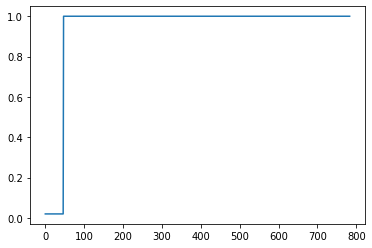

In [0]:
plt.plot(pvals) #Plotting pvalues found by Horn's Parallel Analysis

In [0]:
temp=np.argwhere(pvals<1)
temp[-1,0] #finding thr minimum k which has pvalue=1



46

In [0]:
#k = temp[-1,0]+5 #Reduced Dimension of dataset
k=51
x_truncated = tf.matmul(u[:,0:k], s[0:k,0:k]) #Reducing the dimension of the data
print('original data shape',x.shape)
print('reduced data shape', x_truncated.shape)

original data shape (70000, 784)
reduced data shape (70000, 51)


In [0]:
from tensorflow import keras
# Network and training parameters for PCA-FNN
EPOCHS = 15
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # validation set split

In [0]:
x_train=x_truncated[0:60000,:]
x_test=x_truncated[60000:70000,:]
y_train=y_1
y_test=y_2

In [0]:
print(x_train.shape[0], 'train samples') 
print(x_test.shape[0], 'test samples')
# One-hot representation of the labels.
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES) 
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [0]:
# Build the PCA-FNN model
model = tf.keras.models.Sequential() 
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(k,), name='dense_layer', activation='relu')) 
model.add(keras.layers.Dense(N_HIDDEN, name='dense_layer_2', activation='relu')) 
model.add(keras.layers.Dense(NB_CLASSES, name='dense_layer_3', activation='softmax'))
# Summary of the PCA-FNN model. 
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               6656      
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 24,458
Trainable params: 24,458
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the PCA-FNN  model
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Training the PCA-FNN model
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/15
375/375 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8885 - val_loss: 0.1775 - val_accuracy: 0.9488
Epoch 2/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1492 - accuracy: 0.9561 - val_loss: 0.1237 - val_accuracy: 0.9632
Epoch 3/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1056 - accuracy: 0.9688 - val_loss: 0.1039 - val_accuracy: 0.9704
Epoch 4/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9762 - val_loss: 0.0973 - val_accuracy: 0.9710
Epoch 5/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9801 - val_loss: 0.0920 - val_accuracy: 0.9731
Epoch 6/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0564 - accuracy: 0.9827 - val_loss: 0.0866 - val_accuracy: 0.9760
Epoch 7/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0480 - accuracy: 0.9860 - val_loss: 0.0855 - val_accuracy: 0.9753
Epoch 

In [0]:
# Evaluating the PCA-FNN model
test_loss, test_acc = model.evaluate(x_test, y_test) 
print('Test accuracy with reduced Dimensions k=46:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9792
Test accuracy with reduced Dimensions k=46: 0.979200005531311


In [0]:
#Calculting the confusion matrix of PCA-FNN
y_score=model.predict(x_test)
y_score_classes=y_score.argmax(axis=-1)
y_test_classes=y_test.argmax(axis=-1)
ConfMatrix=tf.math.confusion_matrix(y_test_classes,y_score_classes,num_classes=10)

In [0]:
#Plotting Confusion matrix for PCA_FNN
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


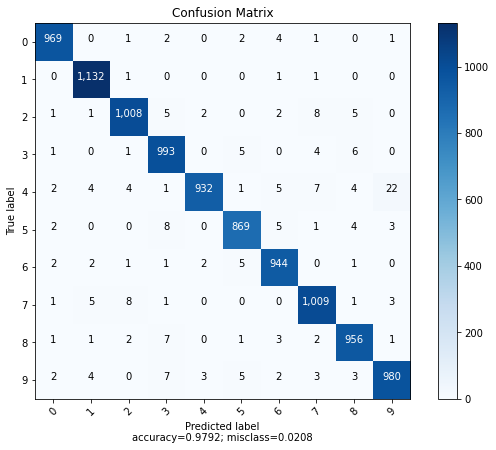

In [0]:
plot_confusion_matrix(cm           = np.reshape(ConfMatrix, ConfMatrix.shape), 
                      normalize    = False,
                      target_names = ['0', '1', '2','3', '4', '5', '6', '7', '8', '9'],
                      title        = "Confusion Matrix")

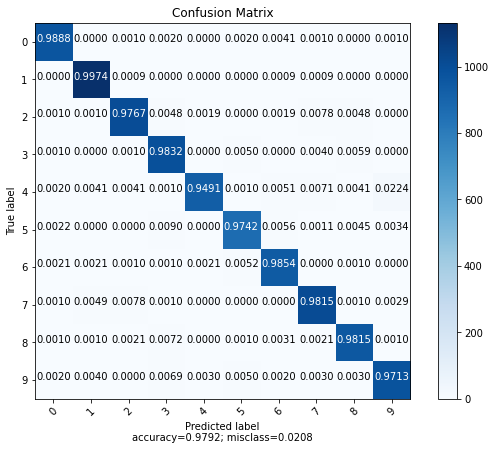

In [0]:
#Normalized confusion matrix of PCA-FNN
plot_confusion_matrix(cm           = np.reshape(ConfMatrix, ConfMatrix.shape), 
                      normalize    = True,
                      target_names = ['0', '1', '2','3', '4', '5', '6', '7', '8', '9'],
                      title        = "Confusion Matrix")

In [0]:
# Vanilla-FNN model
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize in [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

#build the vanilla FNN model
model1 = tf.keras.models.Sequential()
model1.add(keras.layers.Dense(N_HIDDEN,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model1.add(keras.layers.Dense(N_HIDDEN,
   		name='dense_layer_2', activation='relu'))
model1.add(keras.layers.Dense(NB_CLASSES,
   		name='dense_layer_3', activation='softmax'))

# summary of the vanilla FNN model
model1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
model1.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model1.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3540 - accuracy: 0.9015 - val_loss: 0.1701 - val_accuracy: 0.9525
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.1402 - accuracy: 0.9585 - val_loss: 0.1348 - val_accuracy: 0.9603
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0981 - accuracy: 0.9718 - val_loss: 0.1091 - val_accuracy: 0.9683
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0730 - accuracy: 0.9784 - val_loss: 0.0970 - val_accuracy: 0.9720
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0568 - accuracy: 0.9834 - val_loss: 0.0940 - val_accuracy: 0.9725
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.0951 - val_accuracy: 0.9719
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0940 - val_accuracy: 0.9747
Epoch 

In [0]:
#evaluate the vanilla FNN model
test_loss, test_acc = model1.evaluate(X_test, Y_test)
print('Test accuracy with Original Dimension:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9770
Test accuracy with Original Dimension: 0.9769999980926514


In [0]:
#Accuracy and runtime of PCA-FNN model
import time
start_time=time.time()
test_loss, test_acc = model.evaluate(x_test, y_test) 
print('Test accuracy with reduced Dimensions k=51:', test_acc)
print("--- %s Inference Time on Test Dataset (milliseconds) ---" % ((time.time() - start_time)*1000))

313/313 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9792
Test accuracy with reduced Dimensions k=51: 0.979200005531311
--- 372.41315841674805 Inference Time on Test Dataset (milliseconds) ---


In [0]:
#Accuracy and runtime of vanilla model
import time
start_time=time.time()
test_loss, test_acc = model1.evaluate(X_test, Y_test)
print('Test accuracy with Original Dimension:', test_acc)
print("--- %s Inference Time on Test Dataset: Original Dimension (milliseconds) ---" % ((time.time() - start_time)*1000))

313/313 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 0.9770
Test accuracy with Original Dimension: 0.9769999980926514
--- 440.4637813568115 Inference Time on Test Dataset: Original Dimension (milliseconds) ---
